In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [58]:
def aggregate_demand(inflation, rate=.01, rate_resp=.5, C=1.4, I=1.2, G=3, T=3, NX=1.3, f=1, mpc=.6, d=.3, x=.1):
    ''' Returns aggregate output in function to inflation '''
    return (C + I - d + G + NX - mpc * T) * (1 / (1 - mpc)) - ((d + x) / (1 - mpc)) * (rate + rate_resp * inflation) * 100

In [3]:
def mp(inflation, ex_rate=.01, rate_resp=.5):
    ''' Returns real interestrate in function to inflation '''
    return ex_rate + rate_resp * inflation

In [4]:
def is_c(real_rate, C=1.4, I=1.2, G=3, T=3, NX=1.3, f=1, mpc=.6, d=.3, x=.1):
    ''' Returns real interestrate in function to aggregate output '''
    return (C + I - d + G + NX - mpc * T) * (1 / (1 - mpc)) - ((d + x) / (1 - mpc)) * real_rate * 100

In [66]:
def shift_lras(potential_output_2, potential_output_1=10):
    inflation_rate = np.linspace(0, .2, 41)
    fig, ax = plt.subplots()
    ax.set(xlabel='Aggregate output', ylabel='Inflation rate')
    ax.plot([potential_output_1 for i in range(len(inflation_rate))], 
             inflation_rate, 
             linewidth=3, 
             color='blue')
    ax.plot([potential_output_2 for i in range(len(inflation_rate))], 
             inflation_rate, 
             linewidth=3, 
             color='#cc2512')
    plt.xlim([min(potential_output_1, potential_output_2) * .7, 
              max(potential_output_1, potential_output_2) * 1.2])
    c = 'green' if potential_output_1 - potential_output_2 < 0 else 'red'
    plt.arrow(potential_output_1, 
              inflation_rate[round(len(inflation_rate) / 2)], 
              abs(potential_output_1 - potential_output_2) - (.2 * abs(potential_output_1 - potential_output_2)), 
              0, 
              width=(max(inflation_rate) - min(inflation_rate)) * .03,
              head_length=abs(potential_output_1 - potential_output_2) - (.8 * abs(potential_output_1 - potential_output_2)),
              color=c)
    return fig

In [67]:
def shift_mp(expected_inflation_2, expected_inflation_1=.01):
    inflation_rate = np.linspace(0, max(expected_inflation_1, expected_inflation_2), 41)
    fig, ax = plt.subplots()
    ax.set(xlabel='Inflation rate', ylabel='Real interest rate')
    ax.plot(inflation_rate, 
            mp(inflation_rate, ex_rate=expected_inflation_1),
            color='blue')
    ax.plot(inflation_rate,
            mp(inflation_rate, expected_inflation_2),
            color='#cc2512')
    c = 'green' if expected_inflation_1 - expected_inflation_2 < 0 else 'red'
    plt.arrow(inflation_rate[round(len(inflation_rate) / 2)],
              mp(inflation_rate[round(len(inflation_rate) / 2)], expected_inflation_1),
              0,
              (mp(inflation_rate[round(len(inflation_rate) / 2)], expected_inflation_2) - mp(inflation_rate[round(len(inflation_rate) / 2)])) * .75,
              width=(max(inflation_rate) - min(inflation_rate)) * .03,
              head_length=abs(expected_inflation_2 - expected_inflation_1) - (.8 * abs(expected_inflation_1 - expected_inflation_2)),
              color=c)
    return fig

In [68]:
def shift_is(C=1.4, I=1.2, G=3, T=3, NX=1.3, f=1, mpc=.6, d=.3, x=.1):
    real_interest = np.linspace(0, .15, 31)
    fig, ax = plt.subplots()
    ax.set(xlabel='Aggregate output', ylabel='Real interest rate')
    n_curve = is_c(real_interest)
    c_curve = is_c(real_interest, C, I, G, T, NX, f, mpc, d, x)
    plt.xlim([0, max(n_curve[0], c_curve[0])])
    ax.plot(n_curve, 
            real_interest,
            color='blue')
    ax.plot(c_curve,
            real_interest,
            color='#cc2512')
    c = 'green' if n_curve[0] - c_curve[0] < 0 else 'red'
    plt.arrow(n_curve[round(len(n_curve) / 2)],
                real_interest[round(len(real_interest) / 2)],
                C - 1.4,
                0,
                width=(max(real_interest) - min(real_interest)) * .03,
                head_length=abs(C - 1.4) * .8,
                color=c)
    return fig

In [69]:
C=1.4
I=1.2
G=3
T=3
NX=1.3
f=1
mpc=.6
d=.3
x=.1
is_c(np.linspace(0, .15, 31), C, I, G, T, NX, f, mpc, d, x)

array([12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,  8.5,  8. ,  7.5,  7. ,
        6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,
        1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ])

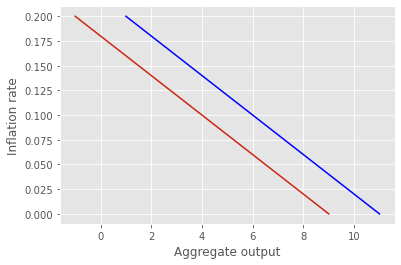

In [65]:
def shift_ad(rate=.01, rate_resp=.5, C=1.4, I=1.2, G=3, T=3, NX=1.3, f=1, mpc=.6, d=.3, x=.1):
    inflation_rate = np.linspace(0, .2, 41)
    fig, ax = plt.subplots()
    ax.set(xlabel='Aggregate output', ylabel='Inflation rate')
    ax.plot(aggregate_demand(inflation_rate), 
            inflation_rate,
            color='blue')
    ax.plot(aggregate_demand(inflation_rate, rate=rate), 
            inflation_rate,
            color='#cc2512')
    return fig
shift_ad(.03).show()